<a href="https://colab.research.google.com/github/Juanariasp/Analisis_Ciencia_Datos/blob/main/CD_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><FONT FACE="times new roman" SIZE=5>
<br>
<i><b>Docente:</b></i> Oscar Elias Herrera Bedoya
<br>
<i><b>Asignatura:</b></i> Introducción a la Ciencia de Datos
<br>
<i><b>Tema:</b></i> Proyecto Ciencia de Datos
<br>
<i><b>Estudiante: </b> </i> Juan Esteban Arias
</FONT>
</div>

#**INTRODUCCIÓN**
___


<font size=4><p align='Justify'>
En la era de la información, la ciencia de datos emerge como una poderosa herramienta para extraer conocimiento y valor a partir de grandes volúmenes de datos. En este proyecto, exploraremos mundo de la ciencia de datos, utilizando todas las herramientas y conceptos del curso.<br><br>
El objetivo principal es comprender cómo podemos abordar un problema desde la perspectiva de los datos. Para lograr esto, nos apoyaremos en las técnicas y conceptos estadísticos de la asignatura, permitiéndonos describir y comprender cada detalle de la información que tenemos a nuestra disposición.<br><br>
Para alcanzar este objetivo, emplearemos diversas librerías de Python, como Pandas y Numpy, que nos permitirán manejar y manipular los datos de manera efectiva. Además, podremos visualizar la información mediante representaciones gráficas, lo que nos proporcionará una comprensión más clara y significativa de los patrones y relaciones presentes en los datos.<br><br>
Una de las técnicas fundamentales en ciencia de datos es la transformación de datos categóricos a numéricos, ya que muchos algoritmos y modelos requieren que los datos estén en formato numérico. Abordaremos esta transformación de manera eficiente y efectiva.
</p>







# **DESARROLLO**
___

<font size=4><p align='justify' >
El dataset utilizado para este laboratorio, fue escogido de la pagina <a href = 'https://archive.ics.uci.edu/ml/index.php'> UCi Machine Learning Repository</a> <br><br>
Los datos están relacionados con campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, fue necesario realizar más de un contacto al mismo cliente para determinar si el producto (depósito a plazo bancario) sería suscrito ('yes') o no ('no').<br><br>
Mas informacion del DataSet -> <a href='https://archive.ics.uci.edu/dataset/222/bank+marketing'>Bank Marketing</a><br><br>
</p>

## **EXPLORACION**
___
<font size=4><p align='justify' >
Se lleva a cabo una exploración inicial con el propósito de familiarizarse con el conjunto de datos que será objeto de estudio. El objetivo es descubrir conexiones entre las variables, identificar aquellas que tienen mayor relevancia y discernir las menos influyentes. Además, resulta crucial comprender la naturaleza de los datos presentes en el conjunto, con el fin de determinar si es necesario llevar a cabo alguna normalización. Asimismo, se examina si existen valores faltantes o atípicos que puedan impactar el desempeño del modelo. Este análisis es efectuado mediante las herramientas proporcionadas por la librería sklearn.
</p>

In [1]:
!pip install lazypredict

In [2]:
# Importar las bibliotecas para manejar y analizar datos

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.impute import SimpleImputer
from plotly.subplots import make_subplots
from sklearn.metrics import accuracy_score
from scipy.stats import pearsonr, spearmanr
from lazypredict.Supervised import LazyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
# Leer un archivo CSV que contiene los datos del banco y almacenarlos en el DataFrame df_bank
df_bank = pd.read_csv("https://raw.githubusercontent.com/Juanariasp/Analisis_Ciencia_Datos/main/bank.csv", delimiter=';')

# Mostrar las primeras filas del DataFrame df_bank para inspeccionar los datos iniciales
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
# Mostrar información resumida sobre el DataFrame df_bank, incluyendo tipos de datos y recuento de valores no nulos
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


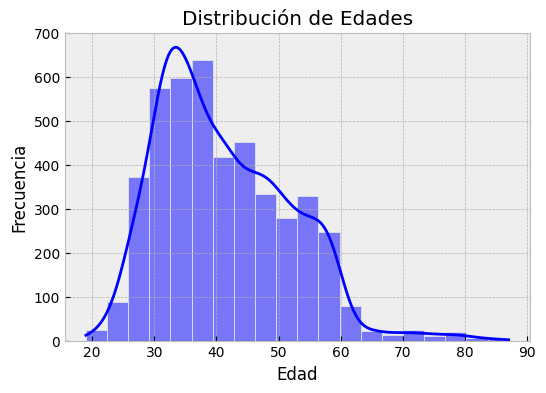

In [6]:
# Representación gráfica: Histograma de edades
plt.style.use('bmh')
plt.figure(figsize=(6, 4))
sns.histplot(df_bank['age'], bins=20, kde=True, color='blue')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [7]:
# Crear el gráfico de barras
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_bank['marital'].value_counts().index,
    y=df_bank['marital'].value_counts(), marker=dict(color=px.colors.qualitative.G10)
))

# Definir el diseño del gráfico
fig.update_layout(
    title='Estado Civil',
    xaxis=dict(title='Estado Civil'),
    yaxis=dict(title='Cantidad'),
    width=450, height=450,
    margin=dict(l=50, r=50, t=50, b=50),
    template='ggplot2'
)

fig.show()

In [8]:
# Crear el gráfico de barras
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_bank['job'].value_counts().index,
    y=df_bank['job'].value_counts(), marker=dict(color=px.colors.qualitative.G10)
))

# Definir el diseño del gráfico
fig.update_layout(
    title='Cantidad de personas por trabajo',
    xaxis=dict(title='Trabajo'),
    yaxis=dict(title='Cantidad'),
    width=550, height=550,
    xaxis_tickangle=-45,
    margin=dict(l=50, r=50, t=50, b=50),
    template='ggplot2'
)

fig.show()

In [9]:
# Representación gráfica de 2 variables nominales con Plotly
fig = px.histogram(df_bank, x='marital', color='y', labels={'marital': 'Estado Civil', 'y': 'Suscripción'}, barmode='group')

fig.update_layout(
    title='Relación entre Estado Civil y Suscripción',
    xaxis=dict(title='Estado Civil'),
    yaxis=dict(title='Cantidad'),
    width=650, height=550,
    xaxis_tickangle=-45,
    margin=dict(l=50, r=50, t=50, b=50),
    template='ggplot2'
)

fig.show()

In [10]:
# Representación gráfica de 2 variables nominales con Plotly
fig = px.histogram(df_bank, x='age', color='y', labels={'age': 'Edad', 'y': 'Suscripción'}, barmode='group')

fig.update_layout(
    title='Relación entre Edad y Suscripción',
    xaxis=dict(title='Edad'),
    yaxis=dict(title='Cantidad'),
    width=650, height=550,
    xaxis_tickangle=-45,
    margin=dict(l=50, r=50, t=50, b=50),
    template='ggplot2'
)

fig.show()

In [11]:
# Representación gráfica de 2 variables nominales con Plotly
fig = px.histogram(df_bank, x='education', color='y', labels={'education': 'Educacion', 'y': 'Suscripción'}, barmode='group')

fig.update_layout(
    title='Relación entre Educacion y Suscripción',
    xaxis=dict(title='Educacion'),
    yaxis=dict(title='Cantidad'),
    width=650, height=550,
    xaxis_tickangle=-45,
    margin=dict(l=50, r=50, t=50, b=50),
    template='ggplot2'
)

fig.show()

In [12]:
# Representación gráfica de 2 variables nominales con Plotly
fig = px.histogram(df_bank, x='job', color='y', labels={'job': 'Educacion', 'y': 'Suscripción'}, barmode='group')

fig.update_layout(
    title='Relación entre Educacion y Suscripción',
    xaxis=dict(title='Educacion'),
    yaxis=dict(title='Cantidad'),
    width=650, height=550,
    xaxis_tickangle=-45,
    margin=dict(l=50, r=50, t=50, b=50),
    template='ggplot2'
)

fig.show()

In [13]:
# Representación gráfica de 2 variables ordinales y nominales
fig = px.box(df_bank, x='education', y='balance', color='education', title='Valores Atipicos')

# Definir el diseño del gráfico
fig.update_layout(
    xaxis_title='Educación',
    yaxis_title='Saldo',
    width=850, height=750,
    margin=dict(l=50, r=50, t=50, b=50),
    template='ggplot2')

fig.show()

In [14]:
# Filtrar valores atípicos
Q1 = df_bank['balance'].quantile(0.25)
Q3 = df_bank['balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_bank = df_bank[(df_bank['balance'] >= lower_bound) & (df_bank['balance'] <= upper_bound)]

# Representación gráfica de 2 variables ordinales y nominales sin valores atípicos
fig = px.box(df_bank, x='education', y='balance', color='education', title='Valores Atipicos')

# Definir el diseño del gráfico
fig.update_layout(
    xaxis_title='Educación',
    yaxis_title='Saldo',
    width=850, height=750,
    margin=dict(l=50, r=50, t=50, b=50),
    template='ggplot2')

fig.show()

In [15]:
# Medidas de tendencia central
mean_age = df_bank['age'].mean()
median_balance = df_bank['balance'].median()
mode_job = df_bank['job'].mode()[0]
mode_marital = df_bank['marital'].mode()[0]

# Medidas de dispersión (saldo medio anual, en euros)
# Utilizamos quantile() para calcular el rango intercuartil (IQR) de la columna 'duration'.
std_dev_balance = df_bank['balance'].std()

# Mostrar los resultados
print(f"Desviación estándar del saldo (balance): {std_dev_balance:.2f}")
print(f"Mediana del saldo (balance): {median_balance}")
print(f"Media de edad: {mean_age}")
print(f"Moda de empleo: {mode_job}")
print(f"Moda de estado: {mode_marital}")

Desviación estándar del saldo (balance): 869.80
Mediana del saldo (balance): 340.0
Media de edad: 40.8986301369863
Moda de empleo: blue-collar
Moda de estado: married


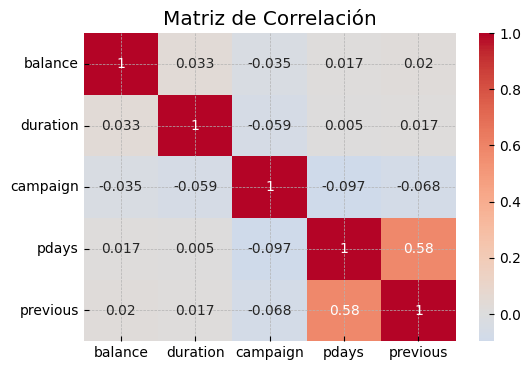

In [16]:
# Matriz de correlación
correlation_matrix = df_bank[['balance', 'duration', 'campaign', 'pdays', 'previous']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

##**PROCESAMIENTO**
___
<font size=4><p align='justify' >
En la fase de procesamiento de datos del proyecto, se ha avanzado más allá de la etapa inicial de exploración para centrarse en la evaluación de dos modelos de predicción fundamentales. Esta etapa implica la implementación y el análisis comparativo de estos modelos utilizando el conjunto de datos, el cual ha sido enriquecido gracias al conocimiento obtenido durante un análisis detallado de las variables y sus relaciones. El objetivo principal de esta etapa es predecir con precisión la variable "Y", que indica si un usuario ha adquirido un préstamo bancario o no. A través de una evaluación minuciosa de los modelos seleccionados, se pretende determinar cuál de ellos se adapta de manera más eficaz a las relaciones y características intrínsecas del conjunto de datos. Al considerar las predicciones resultantes en el contexto de observaciones anteriores y las interacciones entre las variables, se está avanzando de manera significativa hacia la obtención de un entendimiento profundo y un rendimiento eficiente en consonancia con el objetivo general del proyecto.
</p>

In [17]:
# Eliminación de columnas irrelevantes
columns_to_drop = ['contact', 'day', 'month', 'poutcome']
df = df_bank.drop(columns=columns_to_drop)

In [18]:
# Calcula el número de valores nulos en cada columna
print(f"{df.isnull().sum()}")

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64


In [19]:
# Convertir variables categóricas en variables numéricas usando One-Hot Encoding
df2 = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'y'], drop_first=True)

# Visualizamos las columnas creadas
df2.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'y_yes'],
      dtype='object')

In [20]:
# Dividir los datos en características (X) y variable objetivo (y)
X = df2.drop(columns=['y_yes'])
y = df2['y_yes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:09<00:00,  3.21it/s]

[LightGBM] [Info] Number of positive: 363, number of negative: 2849
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 3212, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.113014 -> initscore=-2.060321
[LightGBM] [Info] Start training from score -2.060321


In [22]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.81               0.77     0.77      0.84   
AdaBoostClassifier                 0.88               0.66     0.66      0.88   
LGBMClassifier                     0.88               0.65     0.65      0.88   
XGBClassifier                      0.88               0.65     0.65      0.88   
GaussianNB                         0.84               0.65     0.65      0.85   
DecisionTreeClassifier             0.85               0.63     0.63      0.85   
LinearDiscriminantAnalysis         0.89               0.63     0.63      0.88   
QuadraticDiscriminantAnalysis      0.85               0.62     0.62      0.85   
BaggingClassifier                  0.88               0.62     0.62      0.87   
RandomForestClassifier             0.89               0.62     0.62      0.88   
ExtraTreeClassifier         

In [23]:
# Entrenar un modelo de KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
# Predecir con el modelo y calcular la precisión
y_pred_K = knn_model.predict(X_test)
accuracy_K = accuracy_score(y_test, y_pred_K)

In [25]:
print("Precisión del modelo de KNN:", accuracy_K)

Precisión del modelo de KNN: 0.8667496886674969


In [26]:
X_test.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes'],
      dtype='object')

In [27]:
X_Neighbors = X_test.drop(columns=['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes'])

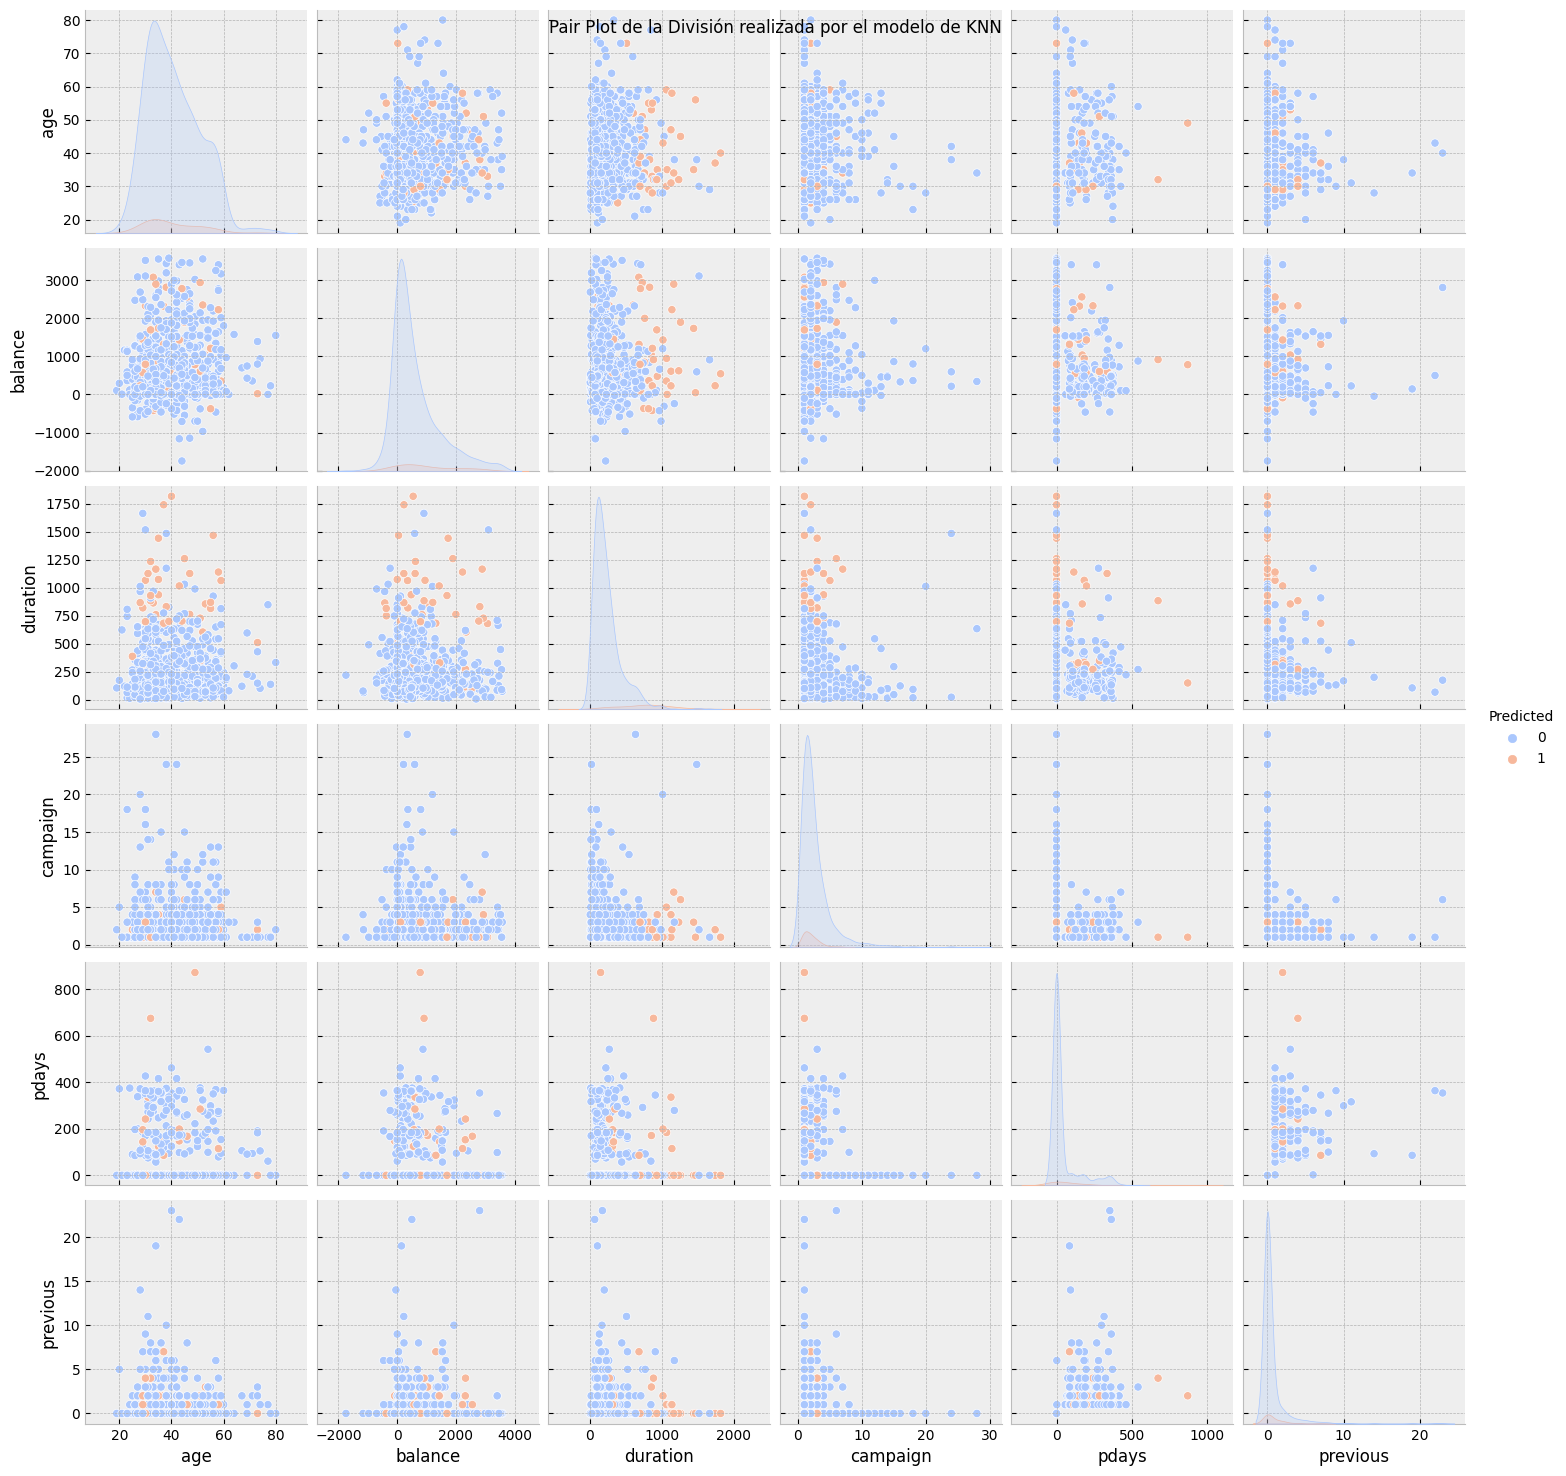

In [28]:
# Agregar las predicciones al DataFrame de prueba
X_Neighbors['Predicted'] = y_pred_K

# Crear un Pair Plot para visualizar la división realizada por el modelo
sns.pairplot(X_Neighbors, hue='Predicted', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pair Plot de la División realizada por el modelo de KNN')
plt.show()

In [29]:
# Crear y entrenar el modelo de árbol de decisión
decision_model = DecisionTreeClassifier(max_depth=3)
decision_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_T = decision_model.predict(X_test)
accuracy_T = accuracy_score(y_test, y_pred_T)

In [30]:
print("Precisión del modelo de Decision Tree:", accuracy_T)

Precisión del modelo de Decision Tree: 0.8829389788293898


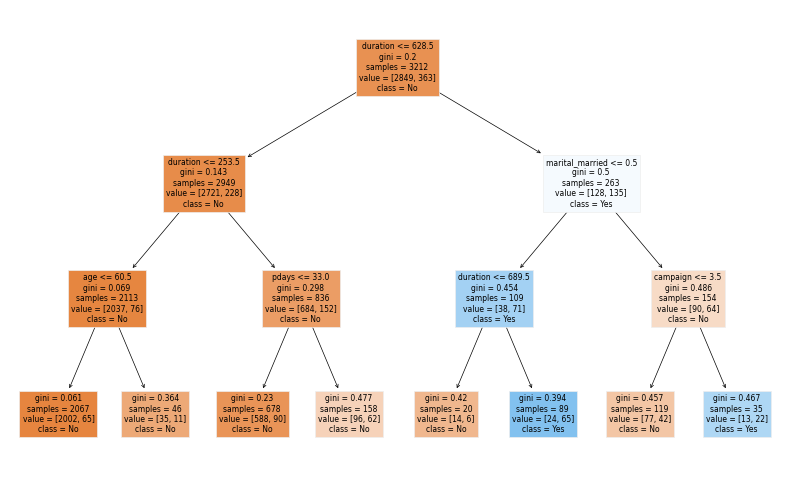

In [31]:
plt.figure(figsize=(10, 6))
plot_tree(decision_model, feature_names=df2.columns,class_names=['No', 'Yes'], filled=True)
plt.show()

#**ANALISIS**
___
<font size=4><p align='justify'>
El análisis exhaustivo de la exploración de datos revela la complejidad de las relaciones en el conjunto de datos, que presenta diversas variables categóricas. Si bien algunas relaciones no son inmediatamente evidentes en un análisis univariable, se observa un fenómeno intrigante al considerar múltiples variables en conjunto. Se reconoce que las variables categóricas pueden interactuar de manera no lineal y contribuir a efectos cruzados, lo que potencialmente afecta las predicciones finales.<br><br>
Para abordar esta complejidad, se aplicó una cuidadosa selección de métodos de codificación y transformación, evaluando cómo diferentes enfoques pueden capturar de manera óptima las sutilezas de las relaciones. El análisis multivariable se convirtió en una herramienta crucial, permitiendo la visualización simultánea de múltiples variables y destacando patrones emergentes que no se habían identificado previamente.<br><br>
Además, se realizó un análisis de correlación adaptado a variables categóricas, junto con la evaluación de coeficientes de contingencia, con el fin de identificar posibles conexiones. Estos hallazgos subrayan la importancia de considerar interacciones entre variables categóricas y numéricas para una comprensión más completa.<br><br>
El resultado más impactante radica en la evaluación de modelos de predicción. Aunque algunas relaciones no fueron aparentes en la exploración inicial, se observó que al considerar todas las variables en el proceso de predicción, el modelo demuestra una capacidad notable para prever la variable objetivo, que indica si un usuario ha tomado un préstamo bancario o no. Estos resultados destacan la necesidad de un enfoque más holístico y sofisticado para abordar la complejidad de las variables categóricas en la exploración y el modelado de datos.
</p>

# **CONCLUSIONES**
___
<font size=4><p align='justify'>
A pesar de la inicial falta de claridad en algunas relaciones durante el análisis univariable, se ha revelado un fenómeno al considerar múltiples variables en conjunto. Las variables categóricas, aunque no revelaban de inmediato relaciones directas, exhiben una interacción no lineal y contribuciones cruzadas que potencialmente impactan en las predicciones finales.<br><br>
La aplicación de métodos selectos de codificación y transformación para manejar la complejidad de las variables categóricas ha demostrado ser vital. La adopción del análisis multivariable ha desempeñado un papel crítico al permitir la visualización simultánea de múltiples variables y destacar patrones emergentes previamente no identificados.<br><br>
La adaptación del análisis de correlación a las variables categóricas, junto con la evaluación de coeficientes de contingencia, ha permitido identificar conexiones sutiles. Estos resultados subrayan la importancia de reconocer las interacciones entre variables categóricas y numéricas para lograr una comprensión más holística.<br><br>
Sin embargo, el aspecto más impactante se manifiesta en la evaluación de los modelos de predicción. A pesar de la falta inicial de visibilidad en algunas relaciones, los modelos entrenados, como los árboles de decisión y el K-Nearest Neighbors (KNN), han demostrado una notable capacidad para predecir la variable objetivo. Con un accuracy del 88% y 86% respectivamente, estos resultados resaltan la necesidad de un enfoque matizado y avanzado para enfrentar la complejidad inherente a las variables categóricas en la exploración y el modelado de datos.
</p>